# EDA and Insights for Sales Data

done by Aswathaman Ramachandran <a href="https://www.linkedin.com/in/aswathamanr/"> connect <a>

Import the packages required while processing the data. the packages like numpy ,pandas are important while loading and preprocessing the data seaborn and matplotlib are some packages that are used to display the contents of the data set in a graphical/visual manner.The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

we import the "date" file using the read_excel command with the help of pandas library
Using info() displays the details of all the labels and the count of all the non null objects, (i.e).,Print a concise summary of a DataFrame.

In [2]:
date=pd.read_excel("Desktop\date.xlsx")
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
timestamp                541909 non-null datetime64[ns]
date                     541909 non-null datetime64[ns]
day_name                 541909 non-null object
day_of_month             541909 non-null int64
month_of_year            541909 non-null object
time_of_day(hh:mm:ss)    541909 non-null object
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 24.8+ MB


Next, we load the "sales_data" from the excel file

In [3]:
sales_data=pd.read_excel("Desktop\sales_data.xlsx")
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
transaction id           541909 non-null object
product id               541909 non-null object
product description      540455 non-null object
quantity sold            541909 non-null int64
transaction timestamp    541909 non-null datetime64[ns]
unit price               541909 non-null float64
customer id              406829 non-null float64
transaction country      541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [4]:
sales_data.describe()

,quantity sold,unit price,customer id
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


head() shows the first five values in the data frames similarly we can use the tail() to show the final five values

In [5]:
sales_data.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
date.tail()

,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
541904,2011-12-09 12:50:00,2011-12-09,Friday,9,December,12:50:00
541905,2011-12-09 12:50:00,2011-12-09,Friday,9,December,12:50:00
541906,2011-12-09 12:50:00,2011-12-09,Friday,9,December,12:50:00
541907,2011-12-09 12:50:00,2011-12-09,Friday,9,December,12:50:00
541908,2011-12-09 12:50:00,2011-12-09,Friday,9,December,12:50:00


next we get the column names and change them to a standard template for ease of use

In [7]:
date.columns.values

array(['timestamp', 'date', 'day_name', 'day_of_month', 'month_of_year',
       'time_of_day(hh:mm:ss)'], dtype=object)

In [8]:
sales_data.columns.values

array(['transaction id', 'product id', 'product description',
       'quantity sold', 'transaction timestamp', 'unit price',
       'customer id', 'transaction country'], dtype=object)

In [9]:
sales_data=sales_data.rename(columns={"transaction timestamp": "timestamp","transaction id":"transaction_id","product id":"product_id","product description" :"product_description","quantity sold":"quantity_sold","unit price":"unit_price","customer id":"customer_id","transaction country":"transaction_country"})
date=date.rename(columns={"time_of_day(hh:mm:ss)":"time_of_day"})

In [10]:
sales_data.columns.values

array(['transaction_id', 'product_id', 'product_description',
       'quantity_sold', 'timestamp', 'unit_price', 'customer_id',
       'transaction_country'], dtype=object)

In [11]:
date.columns.values

array(['timestamp', 'date', 'day_name', 'day_of_month', 'month_of_year',
       'time_of_day'], dtype=object)

We check the data sets for the missing values and we get the number of missing values for each of the columns and we find its percentage in total data

In [12]:
total=date.isnull().sum().sort_values()
percent_1=date.isnull().sum()/date.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values()
missing_data=pd.concat([total,percent_2],axis=1,keys=['total','percent'])
print(missing_data)

               total  percent
timestamp          0      0.0
date               0      0.0
day_name           0      0.0
day_of_month       0      0.0
month_of_year      0      0.0
time_of_day        0      0.0


we have found that there are 1454 missing values in the product descriotion which contributes to .3% of the data which is not that much.
we can fill the missing values using the mean values
on the other hand we have found out that there are 135080 values missing from customer_id column whic contributes to 25% of the data which is hard to fill and can affect the outcome drasically if filled wrongly.

In [13]:
total=sales_data.isnull().sum().sort_values()
percent_1=sales_data.isnull().sum()/sales_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values()
missing_data=pd.concat([total,percent_2],axis=1,keys=['total','percent'])
print(missing_data)

                      total  percent
transaction_id            0      0.0
product_id                0      0.0
quantity_sold             0      0.0
timestamp                 0      0.0
unit_price                0      0.0
transaction_country       0      0.0
product_description    1454      0.3
customer_id          135080     24.9


as the next step we merge the data from both the dataframes into a single dataframe by using the "timestamp" from both the files as key.This is done by using concat() command

In [14]:
final=pd.concat([sales_data,date],axis=1,sort=False)

We verify whether the concatanation has taken place correctly. There are 6 columns in date table and 8 columns in sales_data table so when we concatenate the tables it should form 13 columns having the same number of rows in all the three

In [15]:
print(date.shape)
print(sales_data.shape)
print(final.shape)

(541909, 6)
(541909, 8)
(541909, 14)


In [16]:
final.head()

,transaction_id,product_id,product_description,quantity_sold,timestamp,unit_price,customer_id,transaction_country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


we find the unique number of unique products sold by the shop to its customers

In [17]:
final['product_id'].nunique()


4070

we find the total number of unique customers that are visiting the shop

In [18]:
final['customer_id'].nunique()

4372

we get the cost of the highest sold product

In [19]:
final["unit_price"].max()

38970.0

By using the concatenated data frame we form a barchart displaying the days of the month in the order of how much business is done that day.It is observed that the 5-11 is the busiest days of each month and at month ends the sale dips, which is common pattern.For imporving the month end sales we can organise clearance sales during 27,28,29 dates which will improve the sales during those dates

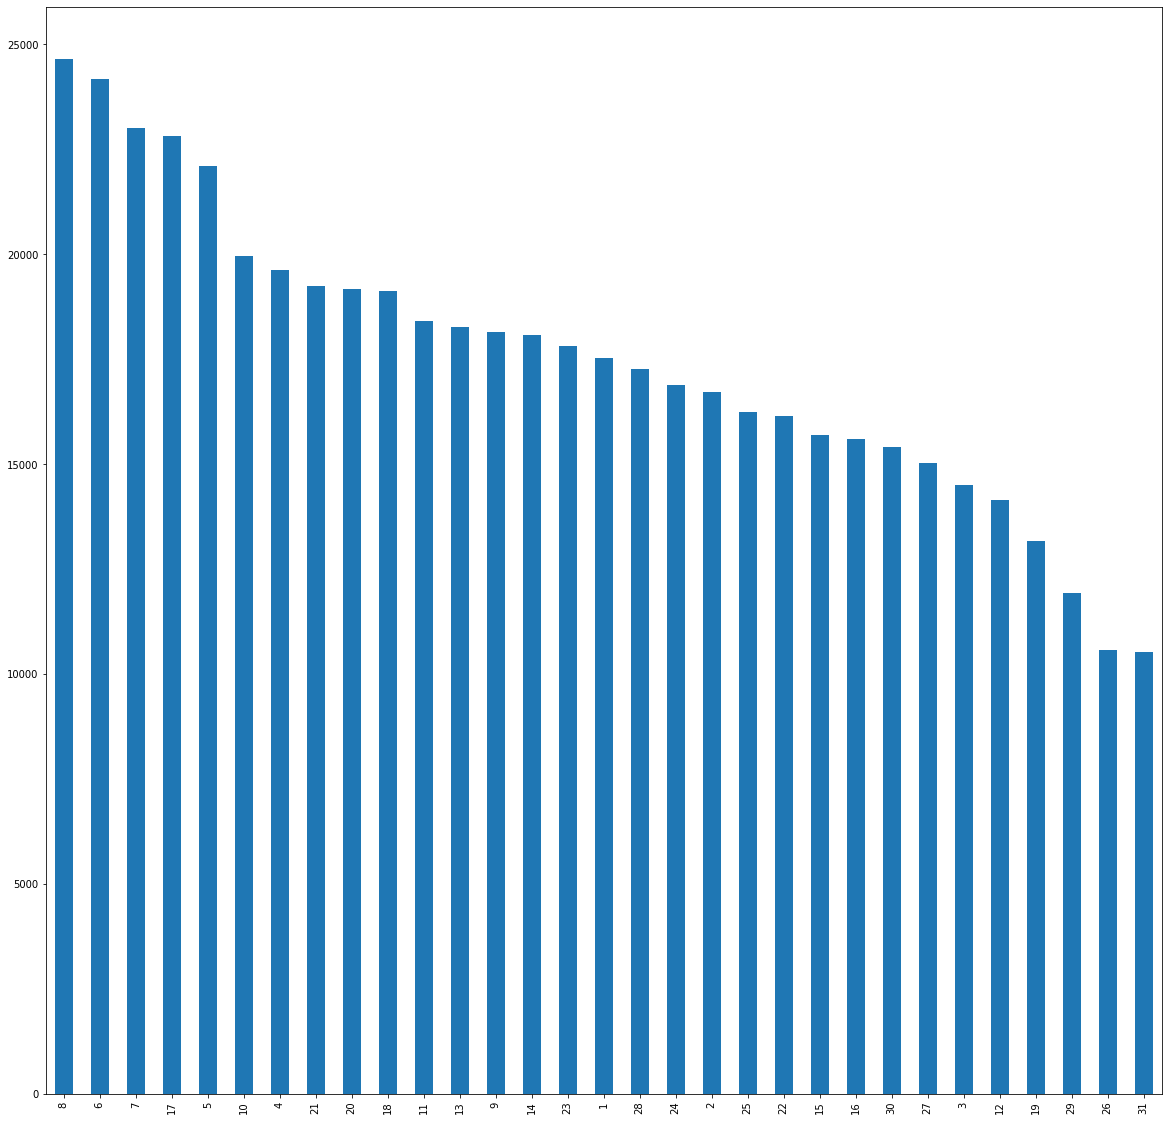

In [20]:
final.day_of_month.value_counts().plot(kind='bar',figsize=(20,20))

we then find out which day of the week is usually the busiest. form the barplot we can observe that saturdays are not working days for the company. If we observe the graph colsely we can find out that the sale usually dips during the weekend and the holiday for the company is done according to that

To get more sales during the weekends we can organize some weekend offers and discounts. We can also organize some promo shows to attract children,most of the weekends the children don't have schools so a promo show for them will attract potential customers to the store 

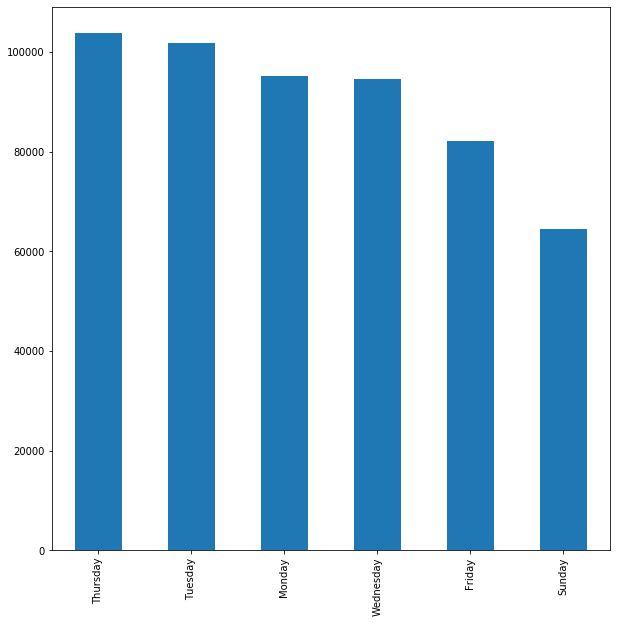

In [21]:
final.day_name.value_counts().plot(kind='bar',figsize=(10,10))

similarly by doing a barchart for the hours. we can observe that the shop opens at 6 am and works till 8 pm.The sale is usually dull during the opening 2 hours and the closing two hours. the sales is at its peak during the afternoons and early evenings

we can employ less number of full time staff for the whole day and use parttime staff during the peak hours.This will save the labour cost

In [22]:
def hr_func(ts):
    return ts.hour

In [23]:
final['hour'] = date['timestamp'].apply(hr_func)

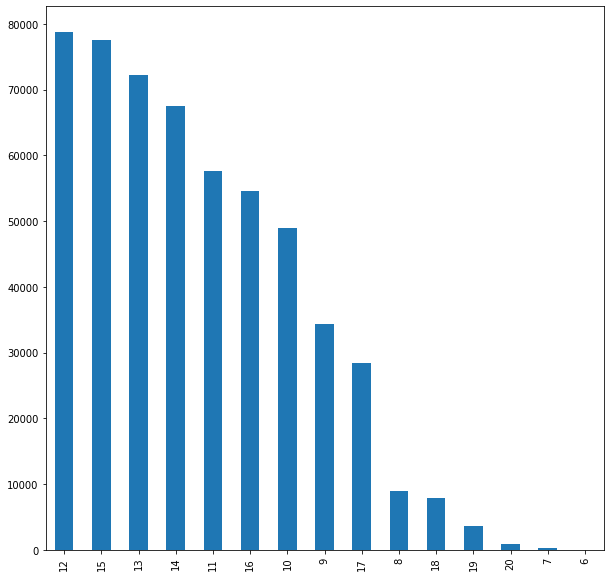

In [24]:
final.hour.value_counts().plot(kind='bar',figsize=(10,10))

we try to identify the correlation between features as our next step and find that there is littile to no correelation between them

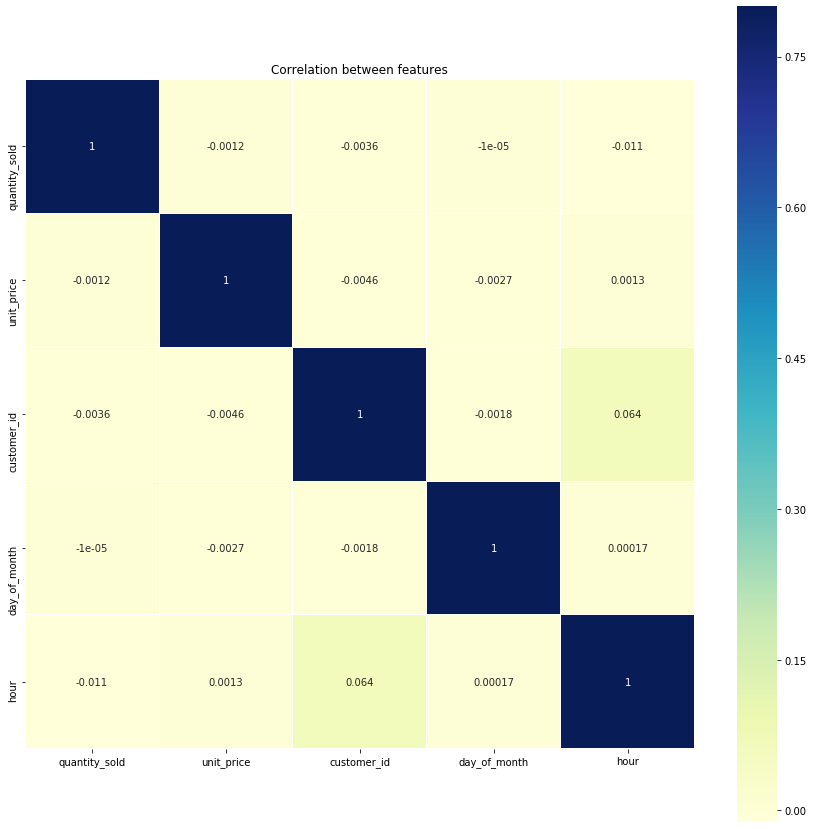

In [25]:
corr=final.corr()
plt.figure(figsize=(15,15))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

we have data only from december of 2010 till december 2o11 and obviously the sales in 2011 have been higher

In [26]:
def yr_func(ts):
    return ts.year

In [27]:
final['year'] = date['timestamp'].apply(yr_func)

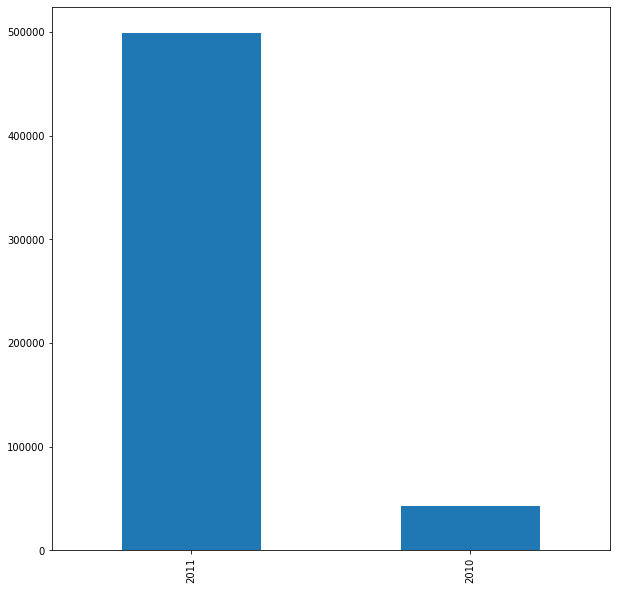

In [28]:
final.year.value_counts().plot(kind='bar',figsize=(10,10))

next, We find the top 10 mostly bought items, this is done by using product_id,,these items can be placed in a strategic place in the store in such a way that the customer has to look around the shop which increases the chances of other items being bought, ultimately leading to increase in sales

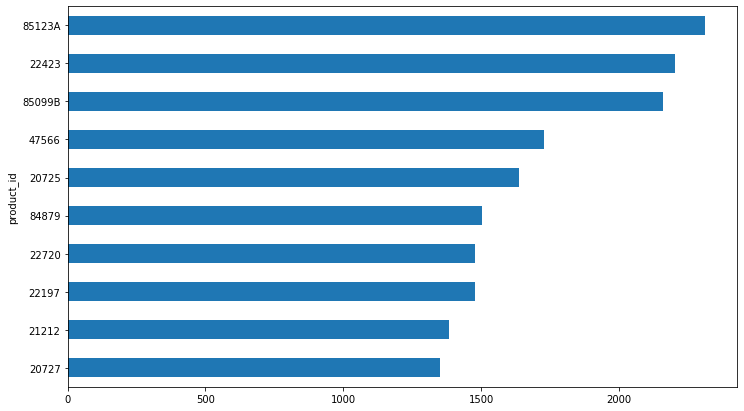

In [29]:
fig1, ax1 = plt.subplots(figsize=(12,7))
final.groupby('product_id')['quantity_sold'].count().nlargest(10).sort_values().plot('barh')

calculate the number of cancelled transcations from the transaction_id by checking whether they have "C" before the id number. there are 9288 cancelled transactions

In [30]:
cancelled_transactions=final.loc[final.transaction_id.str[0]=='C']

In [31]:
print(cancelled_transactions.shape)

(9288, 16)


the most cancelled 10 items are displayed in a barplot and there are some values that differ from the normal structure of the product id they are M,POST,D,S etc.., 

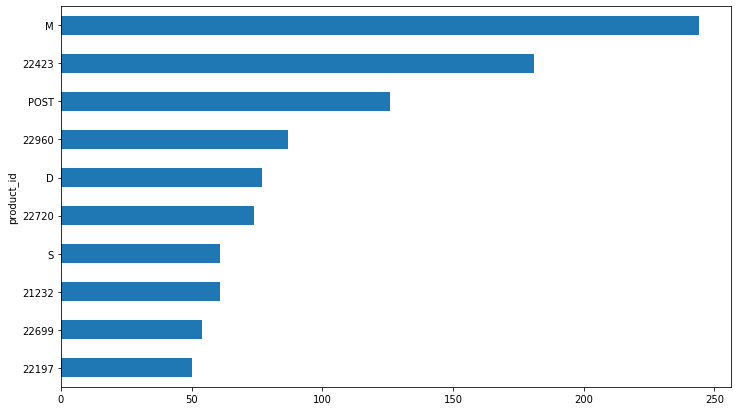

In [32]:
fig2, ax1 = plt.subplots(figsize=(12,7))
cancelled_transactions.groupby('product_id')['quantity_sold'].count().nlargest(10).sort_values().plot('barh')

we find the month in which the cancelled transaction was more.We must find why those months were high in cancellation and rectify them

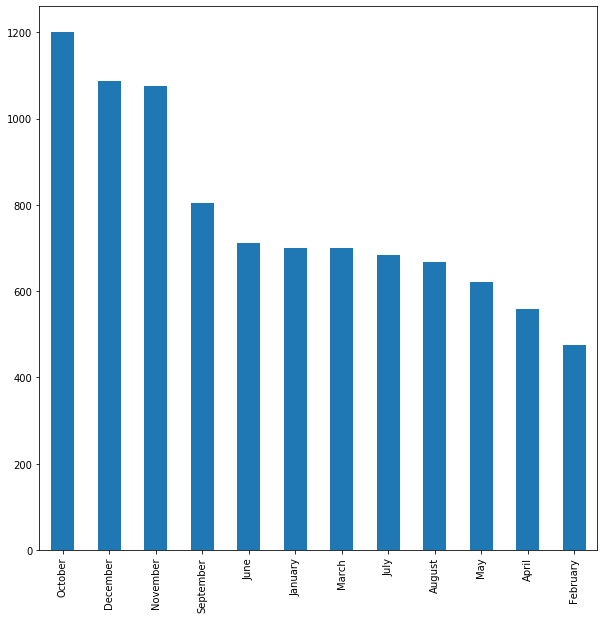

In [33]:
cancelled_transactions.month_of_year.value_counts().plot(kind='bar',figsize=(10,10))

the most number of cancelled transactions have come from the united kingdom which clearly shows that the policies and approaches in the united kingdim has to be changed in such a way that the number of cancelled transactions decreases

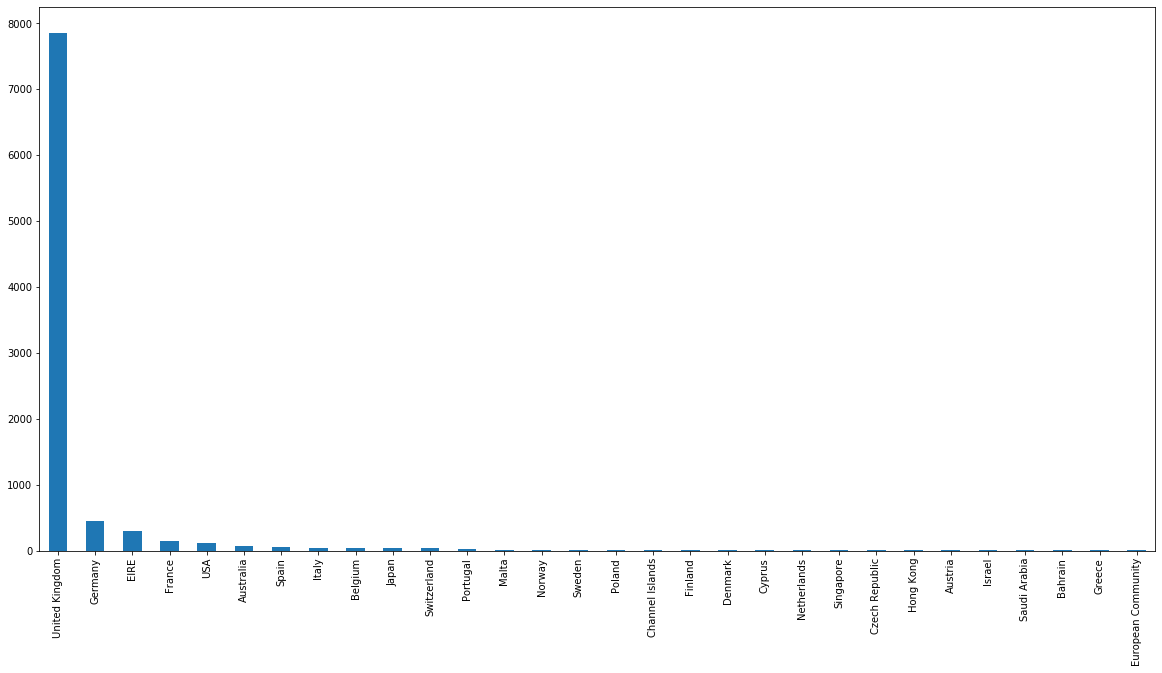

In [34]:
cancelled_transactions.transaction_country.value_counts().plot(kind='bar',figsize=(20,10))

the number of countries where the transactions take place are found out. the total number of countries are ,38 of that the tramsactopn count is given

In [45]:
final.transaction_country.nunique()

38

the most number of transactions have taken place in the united kingdom

In [47]:
final.loc[final.transaction_country=="United Kingdom"].shape[0] / final.shape[0] * 100

91.43195628786383

it contributes to 91.4% of the total sales that have taken place the rest of the countries amount only to 8.6%. if they plan to expand they can target the countries like france,germany etc

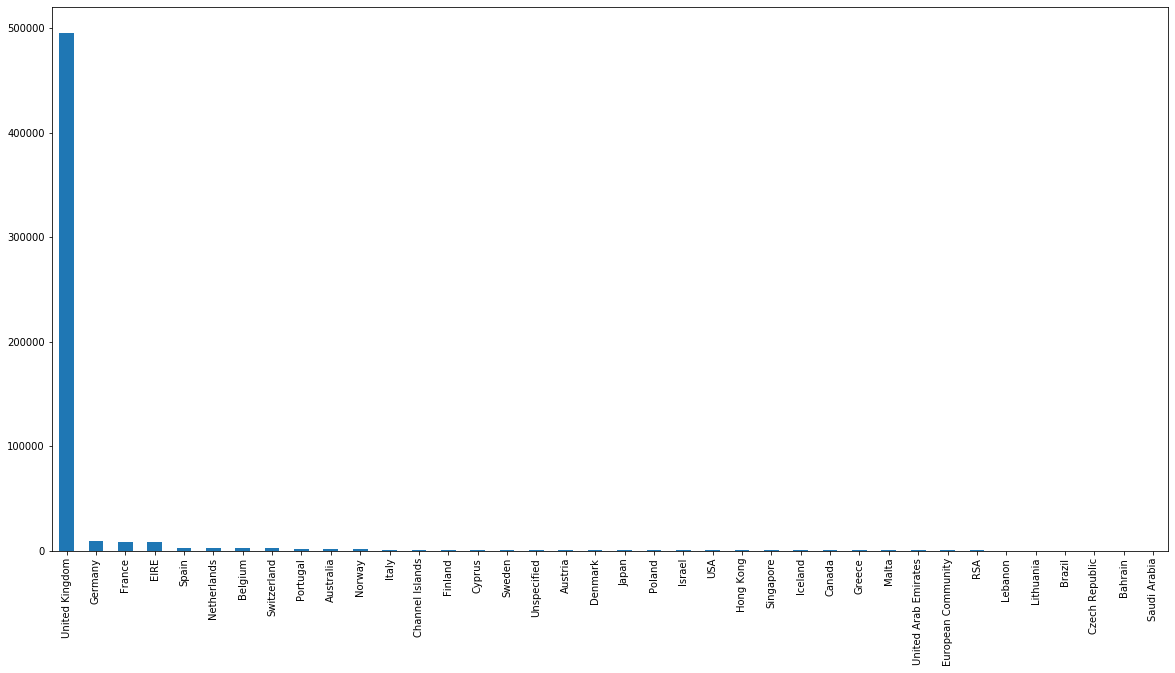

In [35]:
final.transaction_country.value_counts().plot(kind='bar',figsize=(20,10))

next we move onto the product descriptions we get the number of unique product descriptions available.there are 4223 descriptions available

In [38]:
final.product_description.nunique()

4223

we get the most common descriptions available to know what sells the most.The top 30 of the items sold are displayed here. 

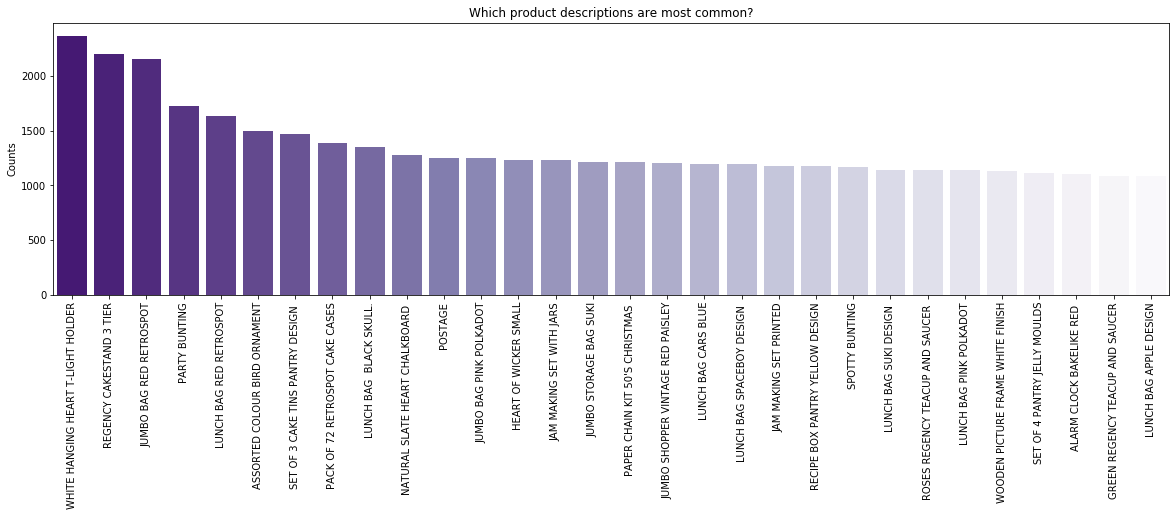

In [39]:
description_counts =final.product_description.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(description_counts.index, description_counts.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Which product descriptions are most common?");
plt.xticks(rotation=90);


most of the products sold in the store range from 1 to 12 in monetary value when we look at minimum value it shows -80995 this shows that there is noise in the data because the cost can't be in the negative

In [48]:
final.quantity_sold.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity_sold, dtype: float64

In [50]:
final["Revenue"] = final.quantity_sold *final.unit_price

final["year"] = final.date.dt.year
final["quarter"] = final.date.dt.quarter
final["week"] = final.date.dt.week
final["day"] = final.date.dt.day
final["dayofyear"] = final.date.dt.dayofyear
final["month"] = final.date.dt.month

In [54]:
features = ["date", "year", "quarter","month","week", "dayofyear", "day","product_id"]

In [58]:
daily_sales_data = pd.DataFrame(final.groupby(features).quantity_sold.sum(),
                          columns=["quantity_sold"])
daily_sales_data["Revenue"] = final.groupby(features).Revenue.sum()
daily_sales_data = daily_sales_data.reset_index()
daily_sales_data.head(5)


,date,year,quarter,month,week,dayofyear,day,product_id,quantity_sold,Revenue
0,2010-12-01,2010,4,12,48,335,1,10002,60,51.00
1,2010-12-01,2010,4,12,48,335,1,10125,2,1.70
2,2010-12-01,2010,4,12,48,335,1,10133,5,4.25
3,2010-12-01,2010,4,12,48,335,1,10135,1,2.51
4,2010-12-01,2010,4,12,48,335,1,11001,3,10.08


we try to find the day to day sales that has taken place and the quantity sold

In [64]:
low_revenue = daily_sales_data.Revenue.quantile(0.01)
high_revenue = daily_sales_data.Revenue.quantile(0.99)
low_quantity = daily_sales_data.quantity_sold.quantile(0.01)
high_quantity = daily_sales_data.quantity_sold.quantile(0.99)

In [66]:
daily_sales_data = daily_sales_data.loc[(daily_sales_data.quantity_sold >= low_quantity) & (daily_sales_data.quantity_sold <= high_quantity)]
daily_sales_data = daily_sales_data.loc[(daily_sales_data.Revenue >= low_revenue) & (daily_sales_data.Revenue <= high_revenue)]

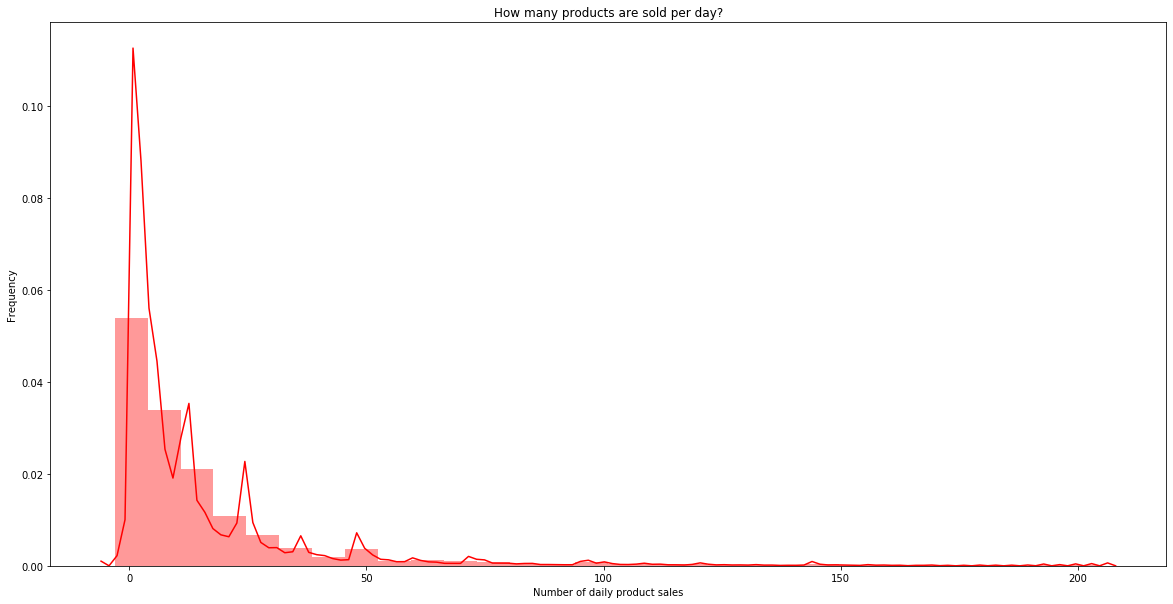

In [83]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(daily_sales_data.quantity_sold.values, kde=True,color="red", bins=30);
ax.set_xlabel("Number of daily product sales");
ax.set_ylabel("Frequency");
ax.set_title("How many products are sold per day?");